In [12]:
from __future__ import print_function
import ete2
import random
import struct
random.seed(123)

# What does a phylogenetic tree look like?

Fortunately, almost everything uses the (mostly) standard Newick format.

Newick format:
(B,(A,C,E),D);

## Importing a Newick tree into ETE

From a string

In [13]:
mini_tree = ete2.Tree('(B,(A,C,E),D);')

In [14]:
print(mini_tree)


   /-B
  |
  |   /-A
  |  |
--|--|--C
  |  |
  |   \-E
  |
   \-D


From a file (more common)

In [15]:
def get_species_name(node_name):
    return node_name.rsplit('_', 1)[0].replace('_', ' ')
loap_tree = ete2.PhyloTree('named.fasttree', format=0, sp_naming_function=get_species_name)

print loap_tree

Although Newick is a fairly good standard, there are a variety of formats it can come in depending on how much information is being recorded. Many of these can be imported by ETE2, and it is generally very good at autodetecting the correct format, but they can be specified if required.

Some vartieties, such as quoted node names, are not supported and need to be corrected before they are imported.

<table border="1" class="docutils">
<colgroup>
<col width="4%">
<col width="33%">
<col width="63%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">FORMAT</th>
<th class="head">DESCRIPTION</th>
<th class="head">SAMPLE</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>0</td>
<td>flexible with support values</td>
<td>((D:0.723274,F:0.567784)1.000000:0.067192,(B:0.279326,H:0.756049)1.000000:0.807788);</td>
</tr>
<tr class="row-odd"><td>1</td>
<td>flexible with internal node names</td>
<td>((D:0.723274,F:0.567784)E:0.067192,(B:0.279326,H:0.756049)B:0.807788);</td>
</tr>
<tr class="row-even"><td>2</td>
<td>all branches + leaf names + internal supports</td>
<td>((D:0.723274,F:0.567784)1.000000:0.067192,(B:0.279326,H:0.756049)1.000000:0.807788);</td>
</tr>
<tr class="row-odd"><td>3</td>
<td>all branches + all names</td>
<td>((D:0.723274,F:0.567784)E:0.067192,(B:0.279326,H:0.756049)B:0.807788);</td>
</tr>
<tr class="row-even"><td>4</td>
<td>leaf branches + leaf names</td>
<td>((D:0.723274,F:0.567784),(B:0.279326,H:0.756049));</td>
</tr>
<tr class="row-odd"><td>5</td>
<td>internal and leaf branches + leaf names</td>
<td>((D:0.723274,F:0.567784):0.067192,(B:0.279326,H:0.756049):0.807788);</td>
</tr>
<tr class="row-even"><td>6</td>
<td>internal branches + leaf names</td>
<td>((D,F):0.067192,(B,H):0.807788);</td>
</tr>
<tr class="row-odd"><td>7</td>
<td>leaf branches + all names</td>
<td>((D:0.723274,F:0.567784)E,(B:0.279326,H:0.756049)B);</td>
</tr>
<tr class="row-even"><td>8</td>
<td>all names</td>
<td>((D,F)E,(B,H)B);</td>
</tr>
<tr class="row-odd"><td>9</td>
<td>leaf names</td>
<td>((D,F),(B,H));</td>
</tr>
<tr class="row-even"><td>100</td>
<td>topology only</td>
<td>((,),(,));</td>
</tr>
</tbody>
</table>

In [16]:
mini_tree = ete2.Tree('(B,(A,C,E),D);', format=9)

In [17]:
t = ete2.Tree()
t.populate(15)
print(t)


            /-aaaaaaaaah
         /-|
        |   \-aaaaaaaaai
        |
      /-|      /-aaaaaaaaaj
     |  |   /-|
     |  |  |   \-aaaaaaaaak
     |   \-|
     |     |   /-aaaaaaaaal
   /-|      \-|
  |  |         \-aaaaaaaaam
  |  |
  |  |      /-aaaaaaaaan
  |  |   /-|
  |  |  |   \-aaaaaaaaao
  |   \-|
--|     |   /-aaaaaaaaaa
  |      \-|
  |         \-aaaaaaaaab
  |
  |      /-aaaaaaaaac
  |   /-|
  |  |  |   /-aaaaaaaaad
  |  |   \-|
   \-|      \-aaaaaaaaae
     |
     |   /-aaaaaaaaaf
      \-|
         \-aaaaaaaaag


### ETE Represented trees as heirarchically connected nodes, with the tree represented by the root node (and subtrees represented by their root node)

In [18]:
print([mini_tree])
print(mini_tree.children)
print(mini_tree.children[1])

[Tree node '' (0x10f64375)]
[Tree node 'B' (0x10f64379), Tree node '' (0x10f643d1), Tree node 'D' (0x10f64381)]

   /-A
  |
--|--C
  |
   \-E


## ETE includes many tools for exploring the basic properties of a tree and its nodes

<table border="1" class="docutils">
<colgroup>
<col width="19%">
<col width="69%">
<col width="12%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method</th>
<th class="head">Description</th>
<th class="head">Default value</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><a class="reference internal" href="../reference/reference_tree.html#ete2.TreeNode.dist" title="ete2.TreeNode.dist"><code class="xref py py-attr docutils literal"><span class="pre">TreeNode.dist</span></code></a></td>
<td>stores the distance from the node to its parent (branch length). Default value = 1.0</td>
<td>1.0</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../reference/reference_tree.html#ete2.TreeNode.support" title="ete2.TreeNode.support"><code class="xref py py-attr docutils literal"><span class="pre">TreeNode.support</span></code></a></td>
<td>informs about the reliability of the partition defined by the node (i.e. bootstrap support)</td>
<td>1.0</td>
</tr>
<tr class="row-even"><td><code class="xref py py-attr docutils literal"><span class="pre">TreeNode.name</span></code></td>
<td>Custom node’s name.</td>
<td>NoName</td>
</tr>
</tbody>
</table>
<table border="1" class="docutils">
<colgroup>
<col width="26%">
<col width="74%">
</colgroup>
<thead valign="bottom">
<tr class="row-odd"><th class="head">Method</th>
<th class="head">Description</th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td><a class="reference internal" href="../reference/reference_tree.html#ete2.TreeNode.is_leaf" title="ete2.TreeNode.is_leaf"><code class="xref py py-func docutils literal"><span class="pre">TreeNode.is_leaf()</span></code></a></td>
<td>returns True if <em>node</em> has no children</td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../reference/reference_tree.html#ete2.TreeNode.is_root" title="ete2.TreeNode.is_root"><code class="xref py py-func docutils literal"><span class="pre">TreeNode.is_root()</span></code></a></td>
<td>returns True if <em>node</em> has no parent</td>
</tr>
<tr class="row-even"><td><a class="reference internal" href="../reference/reference_tree.html#ete2.TreeNode.get_tree_root" title="ete2.TreeNode.get_tree_root"><code class="xref py py-func docutils literal"><span class="pre">TreeNode.get_tree_root()</span></code></a></td>
<td>returns the top-most node within the same tree structure as <em>node</em></td>
</tr>
<tr class="row-odd"><td><code class="xref py py-attr docutils literal"><span class="pre">len(TreeNode)</span></code></td>
<td>returns the number of leaves under <em>node</em></td>
</tr>
<tr class="row-even"><td><code class="xref py py-attr docutils literal"><span class="pre">print</span> <span class="pre">node</span></code></td>
<td>prints a text-based representation of the tree topology under <em>node</em></td>
</tr>
<tr class="row-odd"><td><code class="xref py py-attr docutils literal"><span class="pre">if</span> <span class="pre">node</span> <span class="pre">in</span> <span class="pre">tree</span></code></td>
<td>returns true if <em>node</em> is a leaf under <em>tree</em></td>
</tr>
<tr class="row-even"><td><code class="xref py py-attr docutils literal"><span class="pre">for</span> <span class="pre">leaf</span> <span class="pre">in</span> <span class="pre">node</span></code></td>
<td>iterates over all leaves under <em>node</em></td>
</tr>
<tr class="row-odd"><td><a class="reference internal" href="../reference/reference_tree.html#ete2.TreeNode.show" title="ete2.TreeNode.show"><code class="xref py py-func docutils literal"><span class="pre">TreeNode.show()</span></code></a></td>
<td>Explore node graphically using a GUI.</td>
</tr>
</tbody>
</table>

### ETE makes it easy to explore trees

ETE includes tools to traverse whole trees in several ways

In [19]:
t = ete2.Tree('((((H,K)D,(F,I)G)B,E)A,((L,(N,Q)O)J,(P,S)M)C);', format=1)
print(t.get_ascii(show_internal=True))


            /-H
         /D|
        |   \-K
      /B|
     |  |   /-F
   /A|   \G|
  |  |      \-I
  |  |
  |   \-E
--|
  |      /-L
  |   /J|
  |  |  |   /-N
  |  |   \O|
   \C|      \-Q
     |
     |   /-P
      \M|
         \-S


Postorder (traverse left, traverse right, root)

In [20]:
for node in t.traverse('postorder'):
    print(node.name, end=' ')

H K D F I G B E A L N Q O J P S M C  

Preorder (root, traverse left, traverse right)

In [21]:
for node in t.traverse('preorder'):
    print(node.name, end=' ')

 A B D H K G F I E C J L O N Q M P S 

Levelorder (left->right per level)

In [22]:
for node in t.traverse('levelorder'):
    print(node.name, end=' ')

 A C B E J M D G L O P S H K F I N Q 

Of course you can always manually traverse the tree in any specific manner you wish using 

    TreeNode.up
    TreeNode.children

### ETE has a number of advanced tools for traversing/browsing trees

Most ETE functions for traversing or searching trees can use the `is_leaf_fn` argument. This argument takes a function that returns `True`/`False` whether any given node is a leaf. This can be used to automatically prune trees or to find the first (highest) nodes matching certain criteria.

### Like a good Python library, ETE2 contains functions for both getting and iterating

Most functions that return a series of nodes will exist is two forms, like `get_leaves()` and `iter_leaves()`, the first returns a list of nodes, while the second returns an iterator over all nodes.

In [23]:
mini_tree.get_leaves()

[Tree node 'B' (0x10f64379),
 Tree node 'A' (0x10f6439d),
 Tree node 'C' (0x10f643a1),
 Tree node 'E' (0x10f64371),
 Tree node 'D' (0x10f64381)]

In [24]:
mini_tree.iter_leaves()

<generator object iter_leaves at 0x10f632730>

### You can easily search nodes by any attribute

If you simply want to find all nodes with a particular attribute equal to a value, `search_nodes()` or `iter_search_nodes()` can do this for you. If you have a more complicated search function, they can easily be made by using `traverse()`.

In [25]:
t.search_nodes(name='B')

[Tree node 'B' (0x10f67a61)]

You can both assign nodes any arbitrary attribute you wish, and also search these using the built-in functions.

In [26]:
for node in mini_tree.traverse():
    node.coolness = random.randint(0,3)
mini_tree.search_nodes(coolness=1)[0].coolness

1

### ETE has tools to detect the type of relatedness of specific groups of leaves

In [27]:
t =  ete2.Tree("((((((a, e), i), o),h), u), ((f, g), j));")
print(t)


                  /-a
               /-|
            /-|   \-e
           |  |
         /-|   \-i
        |  |
      /-|   \-o
     |  |
   /-|   \-h
  |  |
  |   \-u
--|
  |      /-f
  |   /-|
   \-|   \-g
     |
      \-j


In [28]:
print(t.check_monophyly(values=["a", "e", "i", "o", "u"], target_attr="name"))

(False, 'polyphyletic', set([Tree node 'h' (0x10f67a8d)]))


In [29]:
print(t.check_monophyly(values=["a", "e", "i", "o"], target_attr="name"))

(True, 'monophyletic', set([]))


In [30]:
print(t.check_monophyly(values=["i", "o"], target_attr="name"))

(False, 'paraphyletic', set([Tree node 'a' (0x10f67a51), Tree node 'e' (0x10f67a85)]))


## ETE supports annotation of nodes with additional information

By default, all nodes contain a name: `TreeNode.name`, branch length: `TreeNode.dist`, and branch support: `TreeNode.support` corresponding to the three Newick format properties. While you can add arbitrary Python attributes to `TreeNode` objects, additional features are enabled if you add these using the `TreeNode.add_features()` function.

In [31]:
A = mini_tree.search_nodes(name='A')[0]
print(A.coolness)
A.add_features(awesomeness=9000)
print(A.awesomeness)

1
9000


One of the added features I mentioned is the support for saving additional annotation information in the form of the New Hampshire eXtended format (NHX)

But attributes added directly to the Python `TreeNode` objects are not.

In [32]:
mini_tree.write(features=['awesomeness'])

'(B:1,(A:1[&&NHX:awesomeness=9000],C:1,E:1)1:1,D:1);'

In [33]:
mini_tree.write(features=['coolness'])

'(B:1[&&NHX:coolness=0],(A:1[&&NHX:coolness=1],C:1[&&NHX:coolness=1],E:1[&&NHX:coolness=3])1:1[&&NHX:coolness=2],D:1[&&NHX:coolness=0]);'

#### Just kidding, apparently since I learned about this feature ETE2 was updated to automatically detect new attributes

I am not sure how far this extends, directly applied attributes do not show up in the `TreeNode.features` so I would suggest using `add_features()` for safety.

In [34]:
A.features

{'awesomeness', 'dist', 'name', 'support'}

## ETE can be used to extensively modify trees

#### New nodes or leaves can be added to trees, and trees can even be constructed from scratch.

In [35]:
t = ete2.Tree()
A = t.add_child(name='A')
B = t.add_child(name='B')
C = A.add_child(name='C') 
D = C.add_sister(name='D')
print(t)


      /-C
   /-|
--|   \-D
  |
   \-B


### Nodes (both internal and leaves) can be detached or eliminated

#### Deleting a node will preserve its child nodes in the original tree, attaching them to the parent node

In [36]:
t = ete2.Tree('((((H,K)D,(F,I)G)B,E)A,((L,(N,Q)O)J,(P,S)M)C);', format=1)
print(t.get_ascii(show_internal=True))


            /-H
         /D|
        |   \-K
      /B|
     |  |   /-F
   /A|   \G|
  |  |      \-I
  |  |
  |   \-E
--|
  |      /-L
  |   /J|
  |  |  |   /-N
  |  |   \O|
   \C|      \-Q
     |
     |   /-P
      \M|
         \-S


In [37]:
J = t.search_nodes(name='J')[0]
J.delete()
print(t.get_ascii(show_internal=True))


            /-H
         /D|
        |   \-K
      /B|
     |  |   /-F
   /A|   \G|
  |  |      \-I
  |  |
  |   \-E
--|
  |      /-P
  |   /M|
  |  |   \-S
  |  |
   \C|--L
     |
     |   /-N
      \O|
         \-Q


#### Detaching a node will remove the whole sub-tree

In [38]:
B = t.search_nodes(name='B')[0]
B.detach() # Can also be done with A.remove_child(B)
print(t.get_ascii(show_internal=True))


   /A /-E
  |
  |      /-P
--|   /M|
  |  |   \-S
  |  |
   \C|--L
     |
     |   /-N
      \O|
         \-Q


In [39]:
print(B)


      /-H
   /-|
  |   \-K
--|
  |   /-F
   \-|
      \-I


### ETE2 contains functions to prune trees

Pruning a tree obtains the minimal topology necessary to connect a subgroup of nodes.

In [40]:
print(t)


   /- /-E
  |
  |      /-P
--|   /-|
  |  |   \-S
  |  |
   \-|--L
     |
     |   /-N
      \-|
         \-Q


In [41]:
t.prune(['E', 'P', 'L', 'Q'])
print(t)


      /-L
     |
   /-|--P
  |  |
--|   \-Q
  |
   \-E


### Both deleting and pruning trees can be done while preserving original branch lengths between nodes

When `preserve_branch_length` is set to true, merged branch lengths are summed to preserve the original overall distances between nodes.

In [42]:
A.delete(preserve_branch_length=True)
t.prune(['L', 'P', 'Q'], preserve_branch_length=True)

### Other tree manipulation functions include copying trees or sub-trees, concatenating trees, resolving multifurcations, and rooting trees

### Additionally, ETE2 contains a variety of methods for comparing trees based on attributes, and can calculate many statistics (RF distance, etc.)

# Visualization of phylogenetic trees using the ETE2 tree drawing engine

ETE2 includes a programmatic tree drawing engine that can produce beautiful vector renderings of trees with many, many customization options.

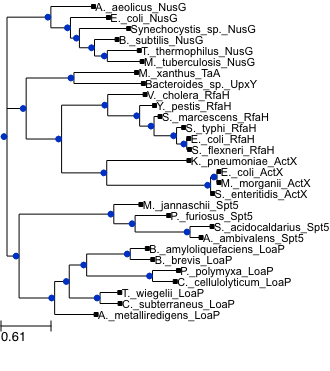

In [43]:
loap_tree.render('%%inline')

#### As mentioned above, trees can be rooted or re-rooted 

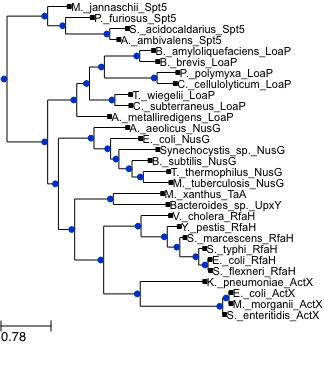

In [44]:
Spt5s = [node for node in loap_tree.iter_leaves() if 'Spt5' in node.name]
loap_tree.set_outgroup(loap_tree.get_common_ancestor(Spt5s))
loap_tree.render('%%inline')

## Visualization can be customized through four elements

* `TreeStyle`: customizes general options for the whole tree
* `NodeStyle`: controls specific aspects of each individual node
* `faces.Face`: Extra graphical information (text, images, shapes, graphs, alignments) added to nodes
* `layout_fn`: A normal python function that is called for each node that can dynamically modify nodes during rendering

#### Branch support can be displayed simply for all nodes using `TreeStyle`

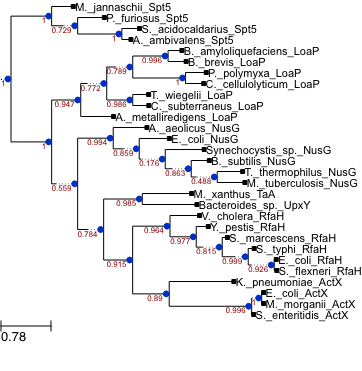

In [45]:
ts = ete2.TreeStyle()
ts.show_branch_support = True
ts.show_leaf_name = False
loap_tree.render('%%inline', tree_style=ts)

#### The formatting and style of individual nodes can be easily customized using `NodeStyle`

In [46]:
subgroups = set(node.name.rsplit('_', 1)[1] for node in loap_tree.iter_leaves())
subgroup_styles = {}
for color, subgroup in zip(ete2.COLOR_SCHEMES['accent'], subgroups):
    subgroup_styles[subgroup] = ete2.NodeStyle()
    subgroup_styles[subgroup]['bgcolor'] = color

In [47]:
for leaf in loap_tree.iter_leaves():
    leaf.set_style(subgroup_styles[leaf.name.rsplit('_', 1)[1]])

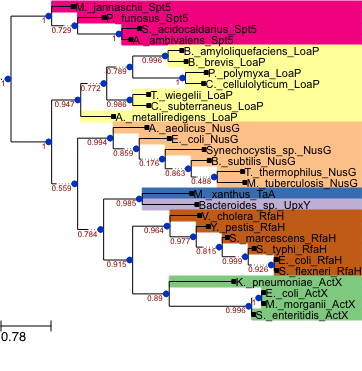

In [48]:
loap_tree.render('%%inline', tree_style=ts)

#### Customizable elements can be added to any location for any node (`Face`s and `layout_fun`)

In this example I add a circle whose size and color correspond to the support value (large and green, support=1, smaller and redder means less support)

/Users/jonathan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: integer argument expected, got float


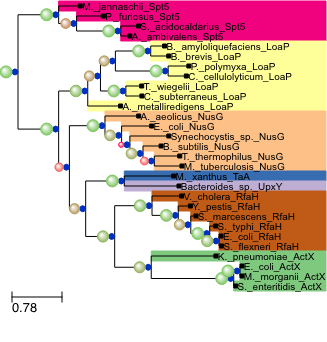

In [49]:
def support_style(node):
    if not node.is_leaf():
        if 0 in node.faces.float:
            node.faces.float.pop(0)
        color = '#'+struct.pack('BBB', 
                                min(255,255.0*(1.5-node.support)),
                                200.0*node.support, 
                                100.0
                               ).encode('hex')
        support = ete2.CircleFace(radius=(4.0*node.support+2), color=color, style='sphere')
        node.add_face(support, column=0, position='float')
ts.layout_fn = support_style
ts.show_branch_support = False
ts.show_leaf_name = True
loap_tree.render('%%inline', tree_style=ts)

#### Trees can be drawn both rectangular or circular

/Users/jonathan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: integer argument expected, got float


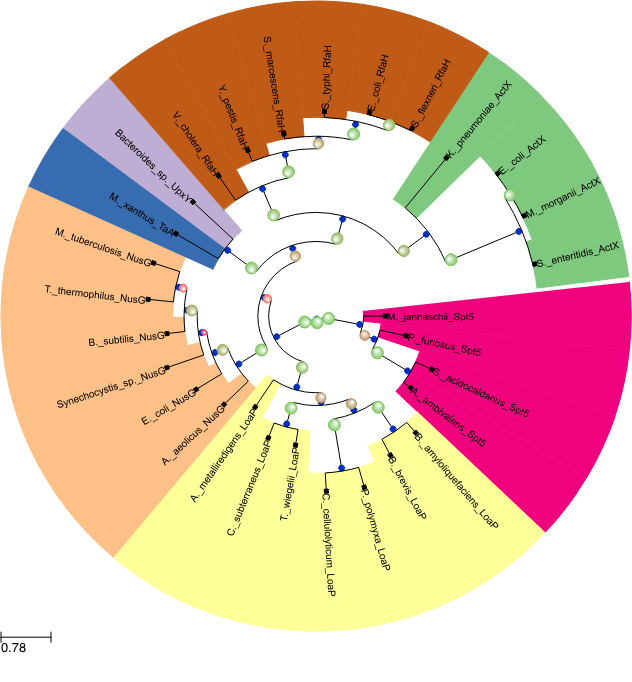

In [50]:
ts.mode = 'c'
loap_tree.render('%%inline', tree_style=ts)

In [ ]:
ts.arc_span = 180
ts.arc_start = 183
ts.show_scale = False
loap_tree.render('%%inline', tree_style=ts)

## A variety of `Face`s are available

* `TextFace`: Static text
* `AttrFace`: Text face uusing specified attribute of a node
* `ImgFace`: Uses external image file (jpg, svg, etc)
* `CircleFace`: A circular (or shaded "spherical" face)
* `RectFace`: Solid rectangle
* `SequenceFace`: Nucleotide or amino acid sequences
* `SeqMotifFace`: A graphical representation of sequence motifs, can take many shapes or individual sequence characters
* `BarChartFace`: Individually rendered bar charts
* `PieChartFace`: Individually rendered pie charts
* `TreeFace`: Takes an entire `Tree` object and renders it as a smaller tree in a `Face` (trees in trees in trees!)


## Trees can be viewed interactively

While ETE2 hasn't quite reached "Web 3.0" levels or whatever the kids are calling it nowadays with interactive browser/javascript-based visualization, it does still have QT-based interactive visualization and manipulation of trees.

In [ ]:
loap_tree.show(tree_style=ts)